In [48]:
import pandas as pd 
small_resnet_df = pd.read_csv("logging/small_resnet/bs=32_dataset=full_ideal_firstNeurons=64_augmented.csv")
small_no_dropout_df = pd.read_csv("logging/small_resnet/bs=64_dataset=full_ideal_firstNeurons=64_augmented__no_dropout.csv")
resnet50_df = pd.read_csv("logging/resnet50/bs=32_dataset=full_ideal_firstNeurons=64_augmented.csv")
transfer_df = pd.read_csv("logging/resnet50_pretrained/bs=32_dataset=full_ideal_firstNeurons=transfer_learn.csv")

In [61]:
def get_max_values(input_df):
    min_idx = input_df["val_mean_absolute_error"].idxmin()
    print(min_idx+1)
    print(input_df.loc[min_idx])


    min_idx = input_df["val_mean_absolute_percentage_error"].idxmin()
    print(min_idx+1)
    print(input_df.loc[min_idx])

    max_idx = input_df["val_r_squared"].idxmax()
    print(max_idx+1)
    print(input_df.loc[max_idx])

In [62]:
get_max_values(small_resnet_df)

70
epoch                                 69.000000
loss                                   0.648610
lr                                     0.000010
mean_absolute_error                    0.648610
mean_absolute_percentage_error        15.223660
r_squared                              0.950305
val_loss                               1.258923
val_mean_absolute_error                1.258923
val_mean_absolute_percentage_error    25.750265
val_r_squared                          0.783622
Name: 69, dtype: float64
37
epoch                                 36.000000
loss                                   1.082017
lr                                     0.001000
mean_absolute_error                    1.082017
mean_absolute_percentage_error        22.615005
r_squared                              0.861795
val_loss                               1.387892
val_mean_absolute_error                1.387892
val_mean_absolute_percentage_error    24.832006
val_r_squared                          0.729803
Name: 36,

In [63]:
get_max_values(resnet50_df)

44
epoch                                 43.000000
loss                                   0.583083
lr                                     0.000100
mean_absolute_error                    0.583083
mean_absolute_percentage_error        13.120184
r_squared                              0.958884
val_loss                               1.474275
val_mean_absolute_error                1.474275
val_mean_absolute_percentage_error    30.055279
val_r_squared                          0.733844
Name: 43, dtype: float64
34
epoch                                 33.000000
loss                                   0.881682
lr                                     0.001000
mean_absolute_error                    0.881682
mean_absolute_percentage_error        18.781300
r_squared                              0.910513
val_loss                               1.578149
val_mean_absolute_error                1.578149
val_mean_absolute_percentage_error    27.262547
val_r_squared                          0.668026
Name: 33,

In [64]:
get_max_values(transfer_df)

62
Unnamed: 0                             0.00000
epoch                                 62.00000
loss                                   1.61150
lr                                     0.00001
mean_absolute_error                    1.61150
mean_absolute_percentage_error        29.24040
r_squared                              0.65050
val_loss                               1.62490
val_mean_absolute_error                1.62490
val_mean_absolute_percentage_error    32.89190
val_r_squared                          0.68480
Name: 61, dtype: float64
50
Unnamed: 0                             0.00000
epoch                                 50.00000
loss                                   1.68870
lr                                     0.00001
mean_absolute_error                    1.68870
mean_absolute_percentage_error        30.40250
r_squared                              0.61540
val_loss                               1.90730
val_mean_absolute_error                1.90730
val_mean_absolute_percentage_

In [4]:
import matplotlib.pyplot as plt  


def plot_loss(data_df, loss_path, percent_path):
    epochs = data_df["epoch"]
    mean_absolute_error = data_df["mean_absolute_error"]
    mean_absolute_percentage_error = data_df["mean_absolute_percentage_error"]
    val_mean_absolute_error = data_df["val_mean_absolute_error"]
    val_mean_absolute_percentage_error = data_df["val_mean_absolute_percentage_error"]
    
    plt.plot(epochs, mean_absolute_error, val_mean_absolute_error)
    plt.xlabel('epochs')
    plt.ylabel('Loss (Mean Absolute Error) (PDFF)')
    plt.ylim(top=2.6)
    plt.title('Loss vs Epochs')    
    plt.legend(['train loss', 'validation loss'])
    plt.savefig(loss_path)
    plt.show()    
    plt.plot(epochs, mean_absolute_percentage_error, val_mean_absolute_percentage_error, label=['train MAPE, validation MAPE'])
    plt.xlabel('epochs')
    plt.ylabel('Mean Absolute Percentage Error (%)')
    plt.ylim(top=50)
    plt.title('Mean Absolute Percentage Error vs Epochs')
    plt.legend(['train % error', 'validation % error'])
    plt.savefig(percent_path)
    plt.show()
    

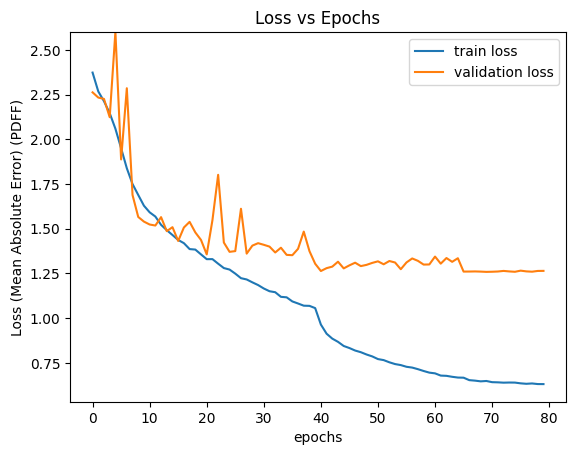

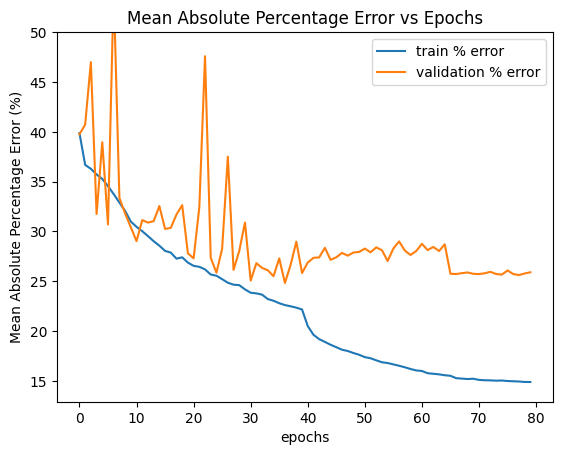

In [118]:
plot_loss(small_resnet_df, loss_path = "plots/small_resnet_bs_32_loss.png", percent_path = "plots/small_resnet_bs_32_percent.png")

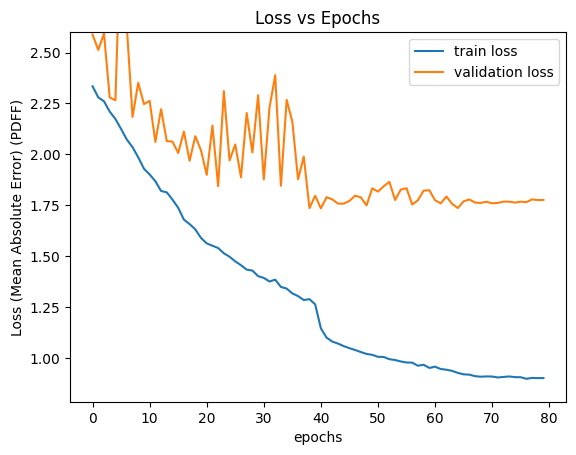

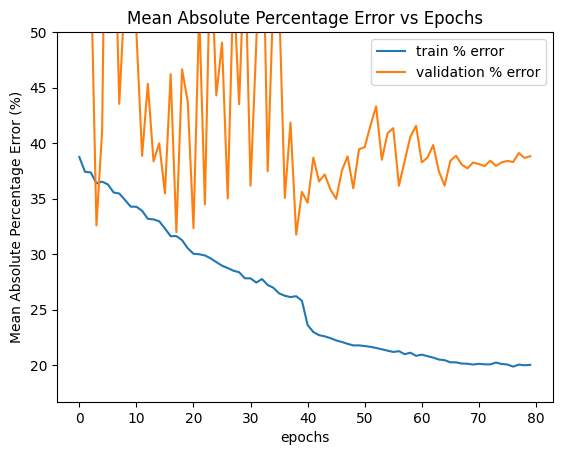

In [5]:
plot_loss(small_no_dropout_df, loss_path="plots/resnet20_bs_64_no_drop_loss.png",percent_path="plots/resnet20_bs_64_no_drop_percent.png" )

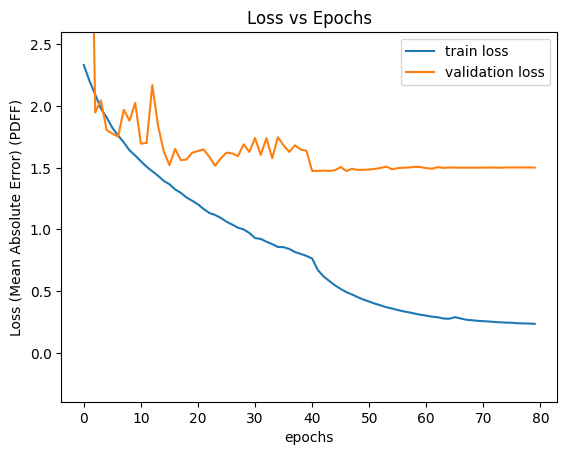

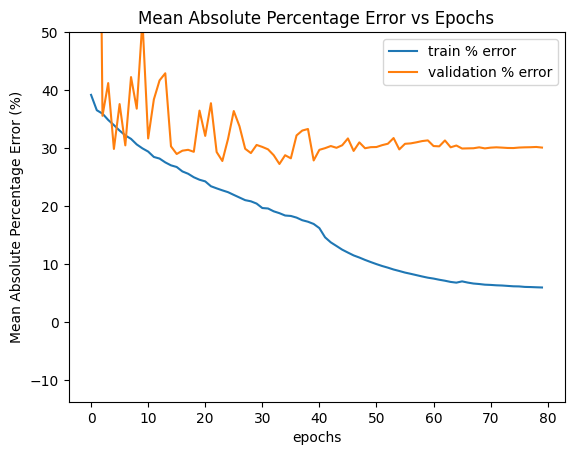

In [119]:
plot_loss(resnet50_df, loss_path="plots/resnet50_bs_64_loss.png", percent_path="plots/resnet50_bs_64_percent.png")

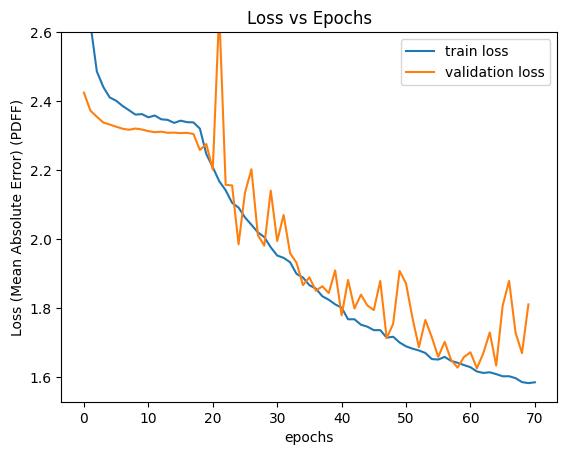

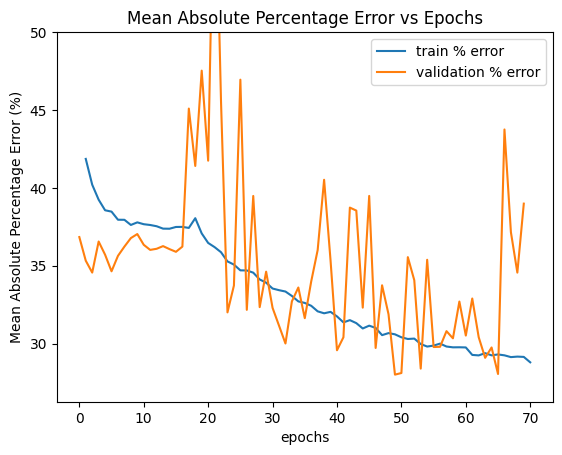

In [120]:
plot_loss(transfer_df, loss_path="plots/transfer_bs_32_loss.png", percent_path="plots/transfer_bs_32_percent.png")

# Extract info from logs

In [22]:
with open("slurm-2007264.out") as file:
    lines = [line.rstrip() for line in file]
len(lines)

60667

In [40]:

line = lines[0]
i = 0
log_indices = []
for line in lines:

    if "Epoch" in line:
        log_indices.append(i-1)
    i += 1
log_indices.pop(0)
print(len(log_indices))

70


In [43]:
metric_names = ["epoch","loss","lr","mean_absolute_error","mean_absolute_percentage_error","r_squared","val_loss","val_mean_absolute_error","val_mean_absolute_percentage_error","val_r_squared"]
log_df = pd.DataFrame(columns=metric_names)

log_metric_names = ["loss", "mean_absolute_error", "mean_absolute_error", "mean_absolute_percentage_error", "r_squared", "val_loss", "val_mean_absolute_error", "val_mean_absolute_percentage_error", "val_r_squared", "lr"]
line_dict = dict()

epoch = 1

for index in log_indices:
    line = lines[index]

    if epoch > 17:
        log_metric_names = ["loss", "mean_absolute_error", "mean_absolute_error", "mean_absolute_percentage_error", "r_squared_1", "val_loss", "val_mean_absolute_error", "val_mean_absolute_percentage_error", "val_r_squared_1"]

    for j in range(0, len(log_metric_names)): #Handle                 

        start_metric_name = log_metric_names[j] + ": "
        start_index = line.find(start_metric_name) + len(start_metric_name)
        if j == len(log_metric_names) - 1:
            end_index = len(line)
        else:
            end_metric_name = "- " + log_metric_names[j+1]    
            end_index =  line.find(end_metric_name)

        metric_val = line[start_index : end_index]    
        metric_key = log_metric_names[j]
        if metric_key[-2:] == "_1":
            metric_key = metric_key[:-2]
        
        line_dict[metric_key] = metric_val
        line_dict["epoch"] = epoch
    
    line_df = pd.DataFrame(line_dict, index=[0])
    log_df = pd.concat([log_df, line_df])

    epoch += 1

log_df.loc[((log_df["epoch"] >= 40) & (log_df["epoch"] < 65)), 'lr'] = 0.00001
log_df.loc[((log_df["epoch"] >= 65) & (log_df["epoch"] < 75)), 'lr'] = 0.000001

log_df.head()

      loss  epoch mean_absolute_error mean_absolute_percentage_error  \
0  1.5844      70             1.5844                        28.7950    

  r_squared val_loss val_mean_absolute_error  \
0   0.6682   1.8104                  1.8104    

  val_mean_absolute_percentage_error val_r_squared          lr  
0                           38.9863         0.6231  1.0000e-04  


,epoch,loss,lr,mean_absolute_error,mean_absolute_percentage_error,r_squared,val_loss,val_mean_absolute_error,val_mean_absolute_percentage_error,val_r_squared
0,1,2.6252,1.0000e-04,2.6252,41.8587,-0.0776,2.4245,2.4245,36.8395,0.0241
0,2,2.4861,1.0000e-04,2.4861,40.2026,0.0175,2.3723,2.3723,35.3212,0.0559
0,3,2.4410,1.0000e-04,2.4410,39.2384,0.0461,2.3546,2.3546,34.5579,0.0654
0,4,2.4106,1.0000e-04,2.4106,38.5596,0.0647,2.3379,2.3379,36.5527,0.1048
0,5,2.4010,1.0000e-04,2.4010,38.4725,0.0725,2.3320,2.3320,35.7062,0.0995


In [46]:
log_df.to_csv("logging/resnet50_pretrained/bs=32_dataset=full_ideal_firstNeurons=transfer_learn.csv")